In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv


In [63]:
def icp():
    
    return 

def correspondences(wx, wy, E, D, Gx, Gy):
    # w weights (pixel)
    # E edges binary
    # D distances
    # G gradient



def compute_w(img):
    # construct the weights like in lecutre
    arr_x = []
    arr_y = []
    for i in range(img.shape[0]):
        arr_x.append(np.arange(0, img.shape[1], 1))
        arr_y.append(np.array([i] * img.shape[1]))
    wx = np.array(arr_x)
    wy = np.array(arr_y)
    return wx, wy
  
def compute_E(img):
    E = cv.Canny(img, 120, 120)
    return E

def compute_D(edges_binary):
    # computes distances from 0 values
    E_invert = cv.bitwise_not(edges_binary)
    D = cv.distanceTransform(E_invert.astype(np.uint8), distanceType=cv.DIST_L2, maskSize=0)
    return D

def compute_G(distances):
    # compute gradient from distances
    kernel = np.array([-1, 0, 1])
    null_kernel = np.array([0, 1, 0])
    grad_x = cv.sepFilter2D(distances, ddepth=-1, kernelX=kernel, kernelY=null_kernel)
    grad_y = cv.sepFilter2D(distances, ddepth=-1, kernelX=null_kernel, kernelY=kernel)

    return grad_x, grad_y


(600, 800) (600, 800)
[[  0.   1.   2. ... 797. 798. 799.]
 [  0.   1.   2. ... 797. 798. 799.]
 [  0.   1.   2. ... 797. 798. 799.]
 ...
 [  0.   1.   2. ... 797. 798. 799.]
 [  0.   1.   2. ... 797. 798. 799.]
 [  0.   1.   2. ... 797. 798. 799.]] [[  0.   0.   0. ...   0.   0.   0.]
 [  1.   1.   1. ...   1.   1.   1.]
 [  2.   2.   2. ...   2.   2.   2.]
 ...
 [597. 597. 597. ... 597. 597. 597.]
 [598. 598. 598. ... 598. 598. 598.]
 [599. 599. 599. ... 599. 599. 599.]]


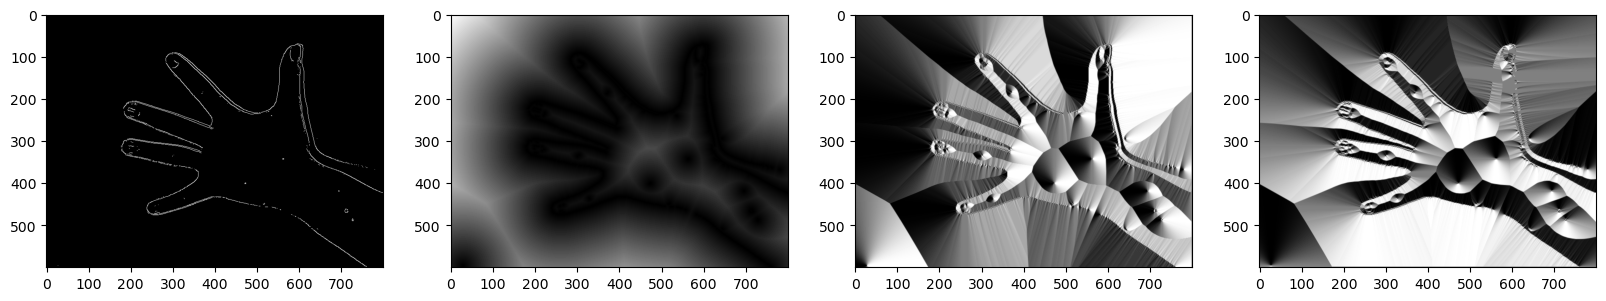

In [65]:
# hand_landmarks.txt adjusted because of stange format of the landmarsk for np textload
hand_landmarks = np.loadtxt("data/hand_landmarks.txt")
hand_img = cv.imread("./data/hand.jpg")

E = compute_E(hand_img)
D = compute_D(E)
Gx, Gy = compute_G(D)
wx, wy = compute_w(hand_img)

correspondences(wx, wy, E, D, Gx, Gy)

_, ax = plt.subplots(1, 4, figsize=(20,5))
ax[0].imshow(E, cmap="gray")
ax[1].imshow(D, cmap="gray")
ax[2].imshow(gx, cmap="gray")
ax[3].imshow(gy, cmap="gray")


icp()